In [3]:
!sqlite3 products.db

zsh:1: command not found: sqlite3


In [2]:
from src.sql_export import SQLExporter
import sqlite3

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
db_name = "products.db"
conn = sqlite3.connect(db_name)

# Load data from the 'products' table
products_query = "SELECT * FROM products;"
products_df = pd.read_sql_query(products_query, conn)

# Load data from the 'parts' table
parts_query = "SELECT * FROM parts;"
parts_df = pd.read_sql_query(parts_query, conn)

# Load data from the 'fibers' table
fibers_query = "SELECT * FROM fibers;"
fibers_df = pd.read_sql_query(fibers_query, conn)

In [2]:
products_df

,product_id,product_category,product_sub_category,original_care_label
0,#113,PANTS,,"Main: 40% Cotton, 60% Polyester, 290 g/m².\nCo..."
1,#212,PANTS,,"Main: DuraTwill, 52% Cotton 48% Polyamide, 240..."
2,#213,PANTS,,"Main: 40% Cotton, 60% Polyester, 290 g/m².\nCo..."
3,#214,PANTS,,"Main: Canvas+, 60% Cotton, 40% Polyester, 340 ..."
4,#312,PANTS,,"Main: DuraTwill, 52% Cotton 48% Polyamide, 240..."
...,...,...,...,...
568,#9794,PANTS,,100% CORDURA®-Polyamide 300 g/m².
569,#9795,ACCESSORY,PHONE-CASE,100% Leather.
570,#9796,ACCESSORY,PHONE-CASE,100% Polyamide.
571,#9797,PANTS,,"49% modacrylic FR, 42% cotton, 5% aramid, 3% p..."


In [3]:
fibers_df.describe(include='all')

,fiber_id,product_id,part_id,name,proportion,brand,original_fiber_name,made_in_france,solution_dyed,recycled
count,2230.000000,2230,2230.000000,2230,2230.000000,2230,2230,2230.000000,2230.000000,2230.000000
unique,NaN,567,NaN,93,NaN,4,177,NaN,NaN,NaN
top,NaN,#6367,NaN,polyester,NaN,,polyester,NaN,NaN,NaN
freq,NaN,15,NaN,564,NaN,1914,304,NaN,NaN,NaN
mean,1115.500000,NaN,527.158296,NaN,50.144619,NaN,NaN,0.034978,0.022870,0.042601
std,643.889872,NaN,291.485295,NaN,35.462458,NaN,NaN,0.183764,0.149522,0.202001
min,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000
25%,558.250000,NaN,275.000000,NaN,17.000000,NaN,NaN,0.000000,0.000000,0.000000
50%,1115.500000,NaN,537.000000,NaN,45.000000,NaN,NaN,0.000000,0.000000,0.000000
75%,1672.750000,NaN,775.750000,NaN,90.000000,NaN,NaN,0.000000,0.000000,0.000000


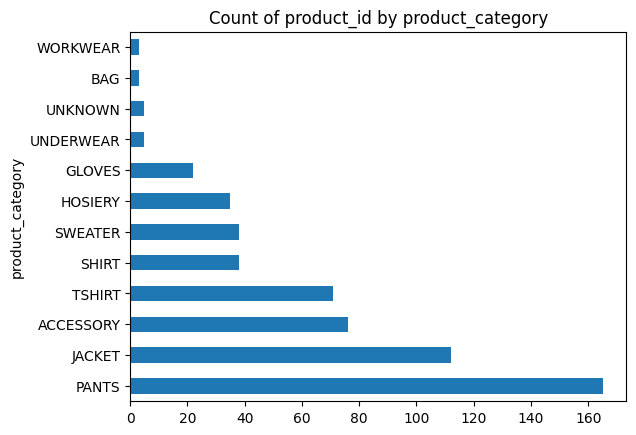

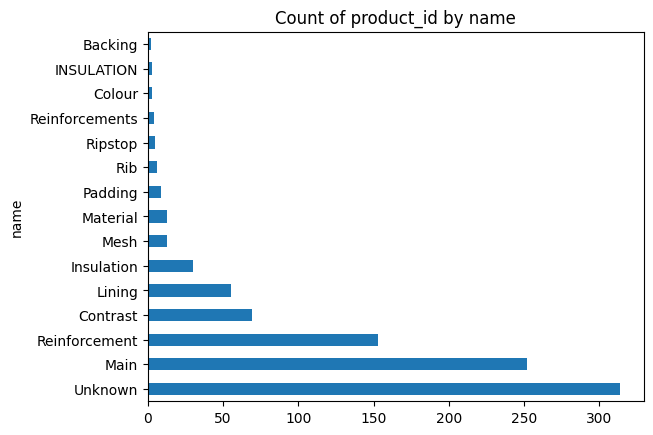

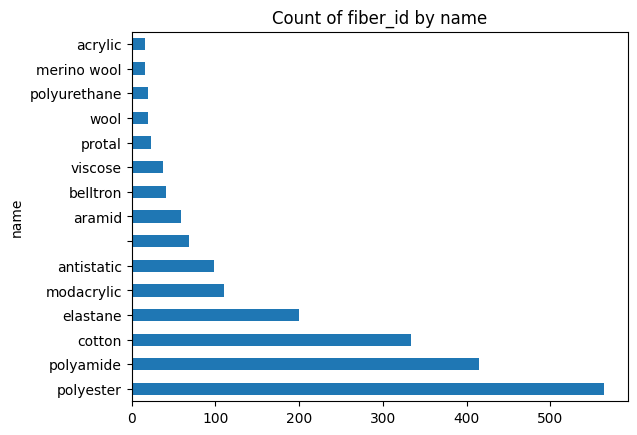

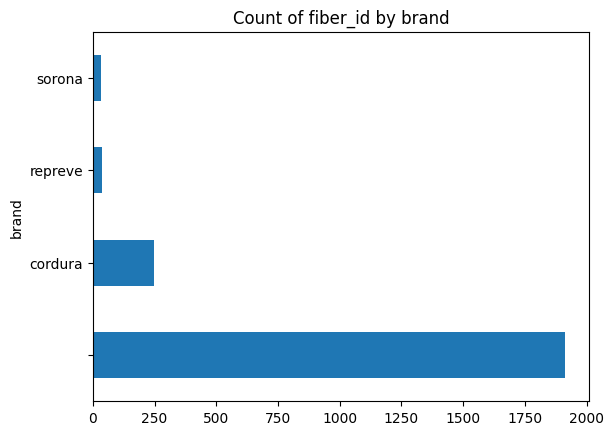

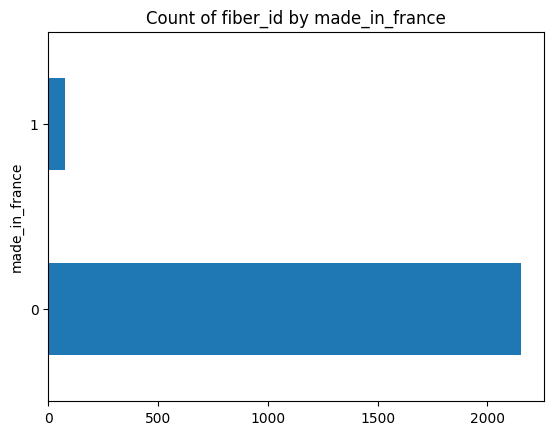

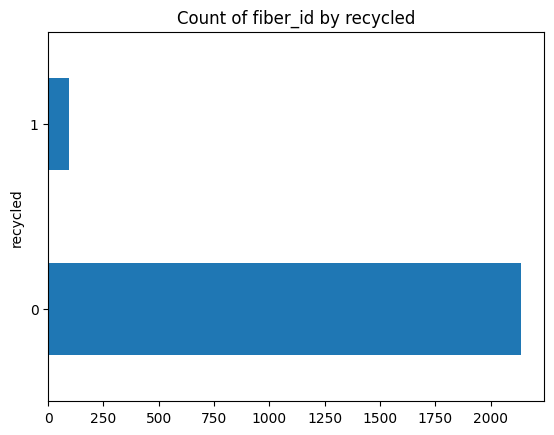

In [4]:
def plot_count(df, col, id_col):
    df.groupby(col)[id_col].nunique().sort_values(ascending=False).head(15).plot(kind='barh')
    plt.title(f'Count of {id_col} by {col}')
    plt.show()
    

plot_count(products_df, 'product_category', 'product_id')
plot_count(parts_df, 'name', 'product_id')
plot_count(fibers_df, 'name', 'fiber_id')
plot_count(fibers_df, 'brand', 'fiber_id')
plot_count(fibers_df, 'made_in_france', 'fiber_id')
plot_count(fibers_df, 'recycled', 'fiber_id')